# **Absenteesm at Work**

**Attribute Informations**

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases  
II Neoplasms  
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
IV Endocrine, nutritional and metabolic diseases  
V Mental and behavioural disorders  
VI Diseases of the nervous system  
VII Diseases of the eye and adnexa  
VIII Diseases of the ear and mastoid process  
IX Diseases of the circulatory system  
X Diseases of the respiratory system  
XI Diseases of the digestive system  
XII Diseases of the skin and subcutaneous tissue  
XIII Diseases of the musculoskeletal system and connective tissue  
XIV Diseases of the genitourinary system  
XV Pregnancy, childbirth and the puerperium  
XVI Certain conditions originating in the perinatal period  
XVII Congenital malformations, deformations and chromosomal abnormalities  
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
XIX Injury, poisoning and certain other consequences of external causes  
XX External causes of morbidity and mortality  
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

1. The dataset is given in two parts. First part is in xls format and another part is in csv format. Read both of them and stack then together in their original order.

In [52]:
import pandas as pd
import numpy as np

data_xls = pd.read_excel("/content/Absentism_at_work1.xlsx")
data_csv = pd.read_csv("/content/Absenteeism_at_work2.csv")

data = pd.concat([data_xls, data_csv])

data.shape

(1131, 21)

2. Find out the id of that person with more number of absent hours.

In [ ]:
data[(data["Transportation expense"]>250)&(data["Age"]>35)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
7,20,23,7,6,1,260,50,11,36,239554,97,0,1,4,1,0,0,65,168,23,4
10,20,1,7,2,1,260,50,11,36,239554,97,0,1,4,1,0,0,65,168,23,8
11,20,1,7,3,1,260,50,11,36,239554,97,0,1,4,1,0,0,65,168,23,8
12,20,11,7,4,1,260,50,11,36,239554,97,0,1,4,1,0,0,65,168,23,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,23,0,5,4,3,378,49,11,36,"237,656",99,1,1,2,0,1,4,65,174,21,0
345,15,22,5,4,3,291,31,12,40,"237,656",99,0,1,1,1,0,1,73,171,25,8
350,15,28,5,5,3,291,31,12,40,"237,656",99,0,1,1,1,0,1,73,171,25,2
361,23,22,6,5,3,378,49,11,36,"275,089",96,0,1,2,0,1,4,65,174,21,8


In [ ]:
x = [1,2,3,4,5]
a = [i*i for i in x]
a

[1, 4, 9, 16, 25]

In [ ]:
# Finding the number of absent hours of each person then summing them to get the total absent hours of each ID
x = data.groupby("ID")["Absenteeism time in hours"].sum()
# print(x)
# "ID" is the key of this obtained pandas series and by x == x.max() we set the items with most maximum absent hours as true
print(list(x[x == x.max()].keys()))

[3]


In [ ]:
### SOLUTION 1

np.argmax([data[data['ID']==id]['Absenteeism time in hours'].sum() for id in list(data['ID'].unique())])+1

### SOLUTION 2

# max_id = data["ID"].max()

# max_absent_hours = 0 

# for id in range(1,max_id+1):

#   if data[data["ID"]==id]["Absenteeism time in hours"].sum() > max_absent_hours:

#     max_absent_hours = data[data["ID"]==id]["Absenteeism time in hours"].sum()

#     person = id

# data[data["ID"]==1]["Absenteeism time in hours"].sum()

3

3. Find the ratio of total absent hours of persons below 45 and persons above 45

In [ ]:
### SOLUTION 1

data[data['Age']<45]['Absenteeism time in hours'].sum()/data[data['Age']>45]['Absenteeism time in hours'].sum()

### SOLUTION 2

below_45 = data[data["Age"]<45]["Absenteeism time in hours"].sum()
after_45 = data[data["Age"]>45]["Absenteeism time in hours"].sum()

below_45/after_45

5.3441822620016275

4. There are two persons one is a drinker but not a smoker and another is a smoker but not a drinker. On the basis of this data on first thought which person do you think to be a better employee.

On running your code it should print "Drinker" or "Smoker" as answer.
Also write your approach as comment.

In [ ]:
## Approach : calculate the average absent hours per drinker and smoker and compare them. 
# If average absent hours per drinker is more than average absent hours for smokers then smoker is a better employee and vice versa

num_only_drinkers = data.loc[(data['Social drinker']==1) & (data['Social smoker']==0)]['ID'].unique().shape[0]
total_absent_hours_of_drinkers = data.loc[(data['Social drinker']==1) & (data['Social smoker']==0)]['Absenteeism time in hours'].sum()
avg_absent_hours_of_drinkers = total_absent_hours_of_drinkers/num_only_drinkers

num_only_smokers = data.loc[(data['Social drinker']==0) & (data['Social smoker']==1)]['ID'].unique().shape[0]
total_absent_hours_of_smokers = data.loc[(data['Social drinker']==0) & (data['Social smoker']==1)]['Absenteeism time in hours'].sum()
avg_absent_hours_of_smokers = total_absent_hours_of_smokers/num_only_smokers

print("Smoker") if avg_absent_hours_of_drinkers >= avg_absent_hours_of_smokers else print("Drinker")

Smoker


5. What percent of all the persons listed have children more than 2?

In [ ]:
total_persons = len(list(data['ID'].unique()))
num_persons_with_children_more_than_two = len(list(data.where(data['Son']>2)['ID'].unique()))
percentage = (num_persons_with_children_more_than_two/total_persons)*100

print(percentage)

8.333333333333332


6. How many persons have education level greater than 2 and also Body mass index greater than 27?

In [ ]:
len(list(data.loc[(data['Education']>2) & (data['Body mass index']>27)]['ID'].unique()))

2

7. Lets define a term "sope" where sope = number of pets + number of children

What is the total absent hours of the person having maximum sope?

In [ ]:
# get the sope column
sope = data['Pet'] + data['Son']
# # max value of sope
# max_sope = sope.max()
# idx = sope[sope==sope.max()].index[0]
# id_having_max_sope = data.loc[idx, 'ID']
# data[data['ID']==id_having_max_sope]['Absenteeism time in hours'].sum()
data[data["ID"]==data.loc[sope[sope==sope.max()].index[0], 'ID']]['Absenteeism time in hours'].sum()

68

8. Arrange all the reasons for absence in decreasing order of their frequencies and print the list where each element will be a tuple like (reason of absence, frequency).

In [ ]:
data['Reason for absence'].value_counts()

23    212
28    175
27    123
13     85
22     61
0      59
19     57
25     56
26     53
10     43
11     33
14     28
18     28
7      23
1      20
12     12
6      12
8      10
21      9
16      6
9       6
5       5
24      4
15      3
4       3
3       2
2       2
17      1
Name: Reason for absence, dtype: int64

9. If the company had declared December and January as vacations and all friday and monday as holidays then which season would have been the most difficult one for the company.

In [ ]:
data_working_days = data.loc[(data['Month of absence']!=1) & (data['Month of absence']!=12) & (data['Day of the week']!=2) & (data['Day of the week']!=6)]

np.argmax([data_working_days.loc[(data_working_days['Seasons']==s)]['Absenteeism time in hours'].sum() for s in list(sorted(data_working_days['Seasons'].unique()))])+1
# # sorted(data['Seasons'].unique())
# list_of_abh_all_seasons = [data.loc[(data['Seasons']==s)]['Absenteeism time in hours'].sum() for s in sorted(data['Seasons'].unique())]
# np.argmax(list_of_abh_all_seasons)+1

3

10. What is the mean and varience of absent hours for each person?

If there are five persons you need to return a list of length five where each element will be a tuple containing mean and varience respectively. (mean, varience)

In [ ]:
def mean_and_varience(sample):
  ## sample is a list of float
  mean = np.mean(sample)
  var = np.sqrt((np.sum([(e-mean)**2 for e in sample])/len(sample)))
  return (mean, var)

all_ids = sorted(list(data['ID'].unique()))
mean_and_varience_of_all_ids = [mean_and_varience(list(data.loc[(data['ID']==id)]['Absenteeism time in hours'])) for id in all_ids]
mean_and_varience_of_all_ids

[(12.096153846153847, 19.347291219051648),
 (9.78, 25.519631658783794),
 (4.163934426229508, 4.887299234741794),
 (4.571428571428571, 5.314592925068078),
 (7.194444444444445, 6.177105778798769),
 (6.754716981132075, 8.891177862793256),
 (16.575, 25.6455527333688),
 (5.257142857142857, 3.425474792057359),
 (7.217391304347826, 7.661062031831916),
 (9.333333333333334, 2.981423969999719),
 (3.3333333333333335, 2.4720661623652207),
 (8.125, 6.280343010802303),
 (5.444444444444445, 5.7370358415224825),
 (3.25, 3.6996621467371855),
 (2.0, 1.632993161855452),
 (3.857142857142857, 2.7479120088101916),
 (5.9411764705882355, 9.762295946411824),
 (6.206896551724138, 4.245722474930037),
 (6.166666666666667, 10.565054205746907),
 (4.666666666666667, 3.0912061651652345),
 (5.113043478260869, 14.425077932057617),
 (12.785714285714286, 19.376637521320692),
 (4.7974683544303796, 8.28966070496428),
 (5.142857142857143, 6.629556577039166),
 (5.333333333333333, 3.7712361663282534),
 (5.090909090909091, 3.8

11. Make a vertical bar plot of total absent hours vs person ids. Save the plot as image.

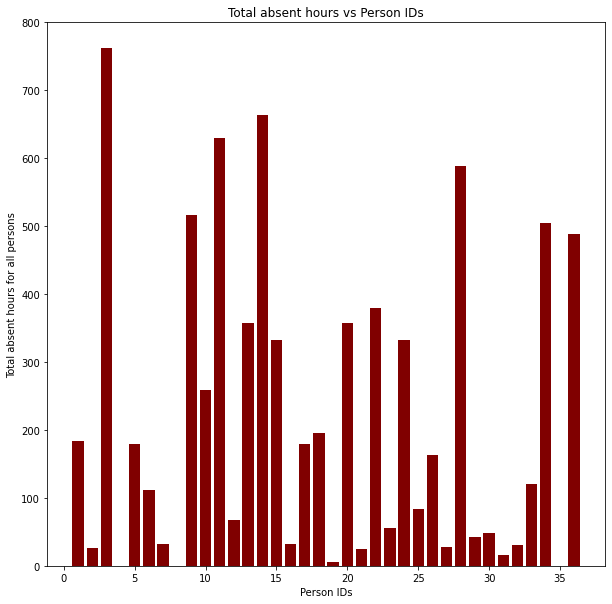

In [ ]:
import matplotlib.pyplot as plt

all_ids = sorted(list(data['ID'].unique()))
total_absent_hours_for_all_ids = [data.loc[(data['ID']==id)]['Absenteeism time in hours'].sum() for id in all_ids]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.bar(all_ids, total_absent_hours_for_all_ids, color='maroon', width=0.8)

ax.set_xlabel("Person IDs")
ax.set_ylabel("Total absent hours for all persons")
ax.set_title("Total absent hours vs Person IDs")

fig.savefig("absent_hours_vs_ids_vertical.png")

plt.show()

12. Make a horizontal bar plot of total absent hours vs month. Save the plot as image.

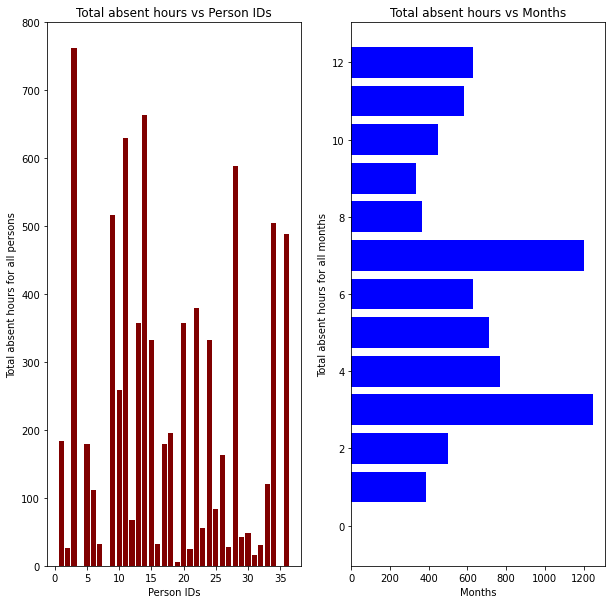

In [ ]:
import matplotlib.pyplot as plt

all_ids = sorted(list(data['ID'].unique()))
total_absent_hours_for_all_ids = [data.loc[(data['ID']==id)]['Absenteeism time in hours'].sum() for id in all_ids]

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].bar(all_ids, total_absent_hours_for_all_ids, color='maroon', width=0.8)

ax[0].set_xlabel("Person IDs")
ax[0].set_ylabel("Total absent hours for all persons")
ax[0].set_title("Total absent hours vs Person IDs")

# fig[0].savefig("absent_hours_vs_ids_vertical.png")



all_months = sorted(list(data['Month of absence'].unique()))
total_absent_hours_for_all_months = [data.loc[(data['Month of absence']==month)]['Absenteeism time in hours'].sum() for month in all_months]

# figm, axm = plt.subplots(1, 1, figsize=(10, 10))

ax[1].barh(all_months, total_absent_hours_for_all_months, color='blue')

ax[1].set_xlabel("Months")
ax[1].set_ylabel("Total absent hours for all months")
ax[1].set_title("Total absent hours vs Months")

# fig[1].savefig("absent_hours_vs_months_horizontal.png")
plt.show()

# **Resources**
1. [Pandas and Matplotlib Tutorial](https://github.com/LearnDataSci/articles/tree/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners)
2. [YouTube Playlist](https://www.youtube.com/watch?v=Iqjy9UqKKuo&list=PLQVvvaa0QuDc-3szzjeP6N6b0aDrrKyL-)
3. [loc, iloc and ix](https://medium.com/@shivangisareen/pandas-data-frames-99fdc661287)